# Seaborn
Search Seaborn on github (documentation under stanford.edu)

## Distribution plots

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips') # a sample dataset

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/home/alvaro/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


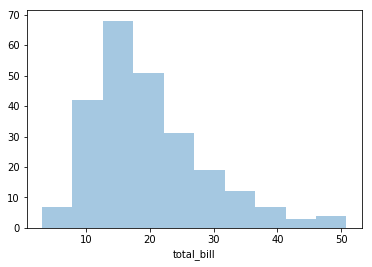

In [5]:
sns.distplot(tips['total_bill'], kde=False, bins=10);

### Joint plot and Pair plot

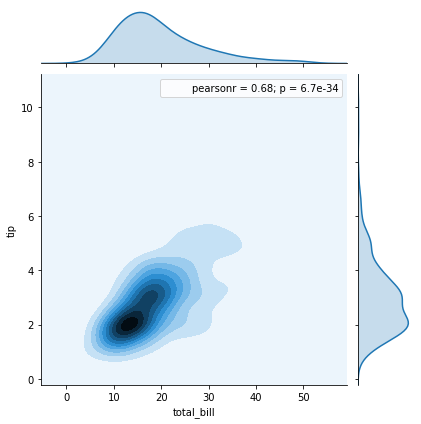

In [6]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

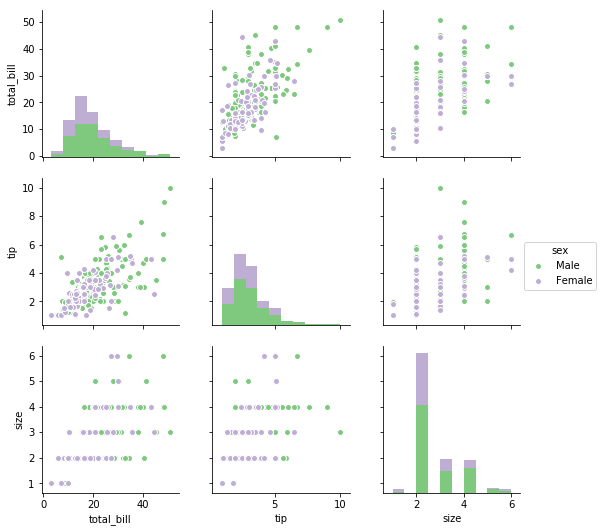

In [7]:
sns.pairplot(tips, hue='sex', palette='Accent')

### Rug plot

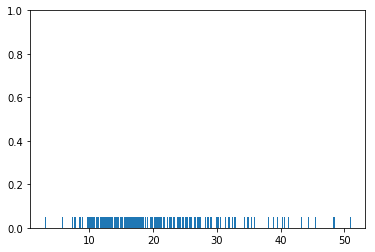

In [8]:
sns.rugplot(tips['total_bill']); #count 1 if appears, 0 if not. just that

/home/alvaro/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


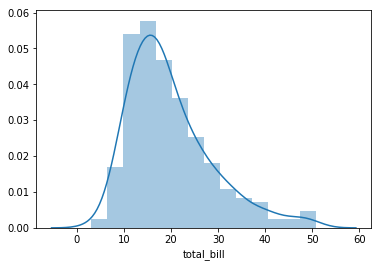

In [9]:
sns.distplot(tips['total_bill']);

# Kernel Density Estimation (kde)

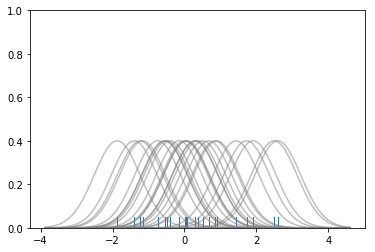

In [10]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dataset = np.random.randn(25)

#Rugplot
sns.rugplot(dataset);

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)


bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

#Create an empty kernel list
kernel_list = []


for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    
    plt.plot(x_axis, kernel, color='grey', alpha=0.5)

plt.ylim(0,1);

we now sum everything app to get the kernel density estimation

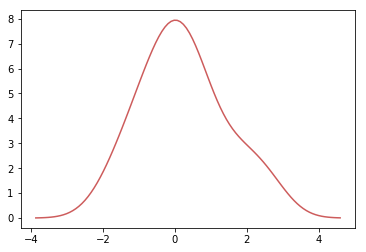

In [11]:
sum_of_kde = np.sum(kernel_list, axis=0)
fig = plt.plot(x_axis, sum_of_kde, color='indianred')

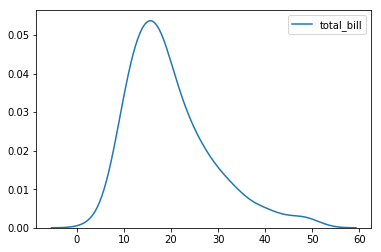

In [12]:
sns.kdeplot(tips['total_bill']);

## Categorical Plots

In [13]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Bar Plot

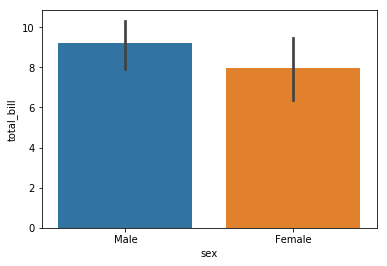

In [14]:
import numpy as np
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std);

### Countplot

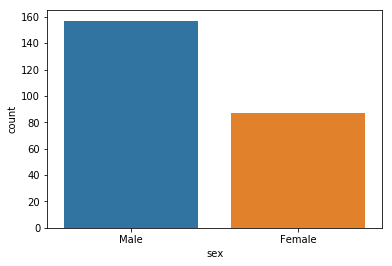

In [15]:
sns.countplot(x='sex', data=tips);

### Box plot

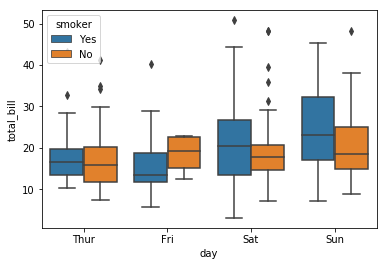

In [16]:
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker');

### Violin plot

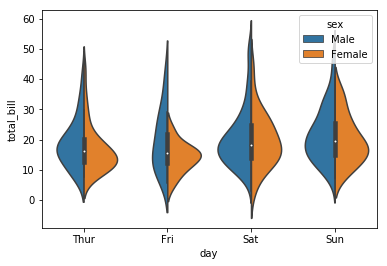

In [17]:
sns.violinplot(x='day', y='total_bill', data=tips, split=True, hue='sex');

### Strip Plot

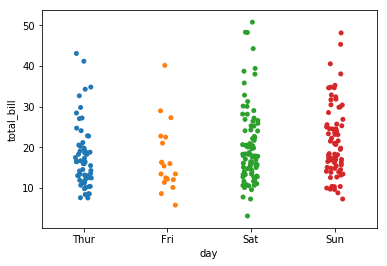

In [18]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True); # jitter adds a sense of concentration

### Swarm plot
a combination of stripplot and violinplot

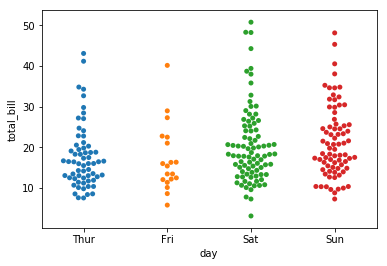

In [19]:
sns.swarmplot(x='day', y='total_bill', data=tips);

Do not use it for big datasets

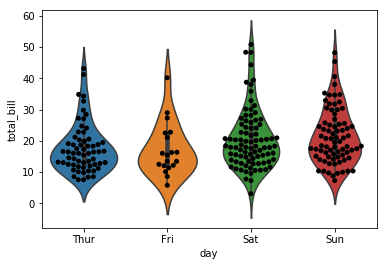

In [20]:
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='black');

### Factor plot

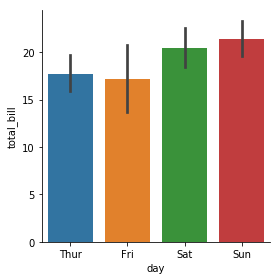

In [21]:
sns.factorplot(x='day', y='total_bill', data=tips, kind='bar'); #kind changes into all others!

## Matrix Plots

In [22]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
flights = sns.load_dataset('flights')

In [24]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


Matrix must match through a columns and rows

In [25]:
tc = tips.corr()

### Heatmap

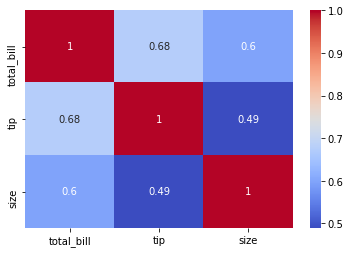

In [26]:
sns.heatmap(tc, annot=True, cmap='coolwarm');

In [27]:
fp = flights.pivot_table(index='month', columns='year', values='passengers')

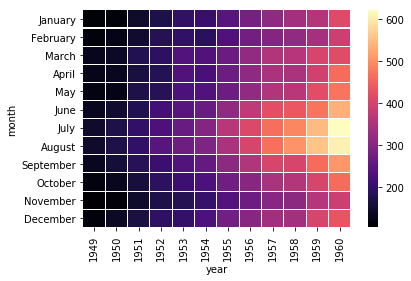

In [28]:
sns.heatmap(fp, cmap='magma', linecolor='white', linewidths=0.1);

### Cluster map

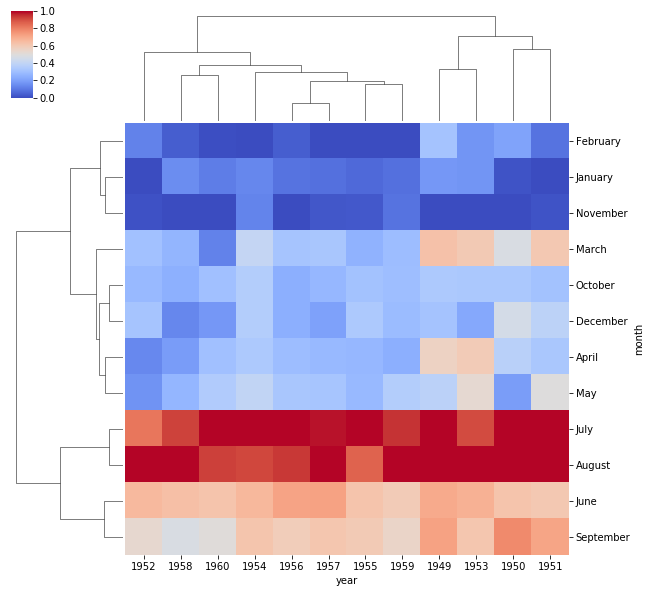

In [29]:
sns.clustermap(fp, cmap='coolwarm', standard_scale=1); #show columns and rows that are similar to each other

# Grid

In [31]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

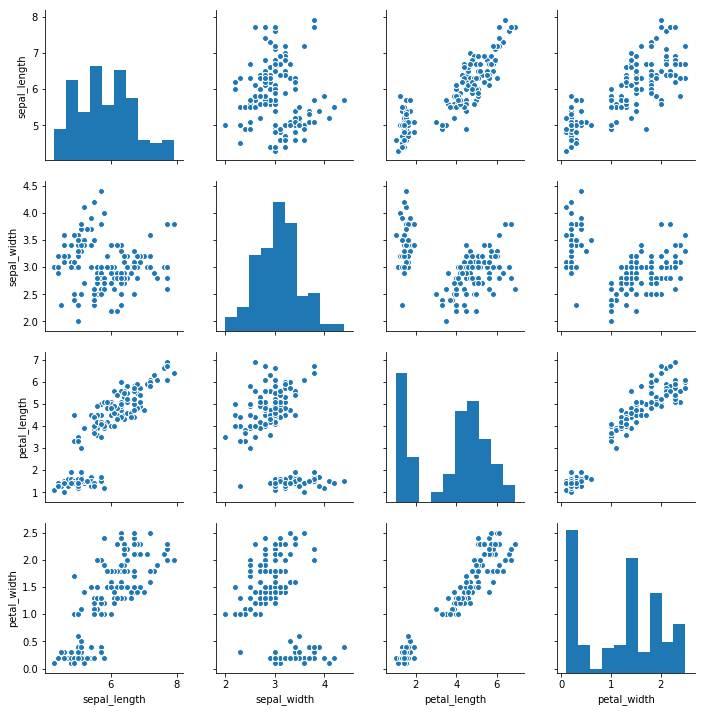

In [33]:
sns.pairplot(iris)

/home/alvaro/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/alvaro/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


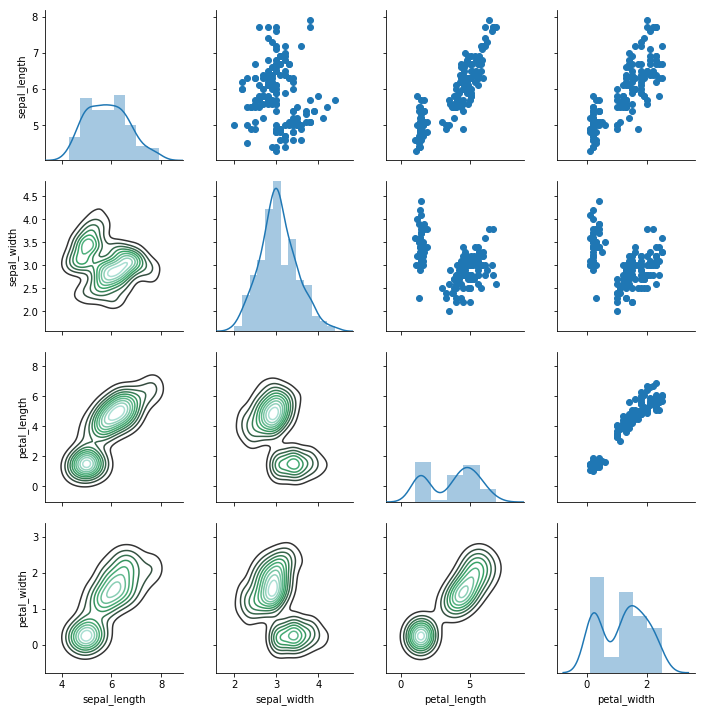

In [38]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot) #much more control over what to show on pairplot

/home/alvaro/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


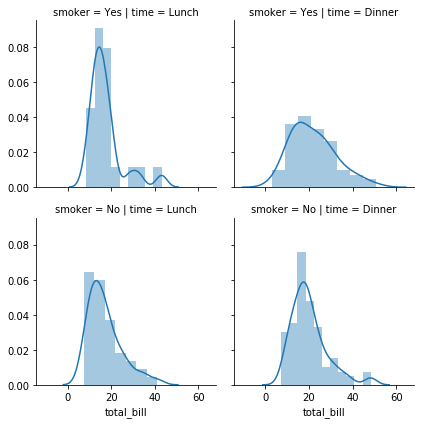

In [42]:
g = sns.FacetGrid(data=tips, col='time', row='smoker')

g.map(sns.distplot, 'total_bill') # plot value of total_bill against different values in cols (times) and rows (yes/no smoker)

## Regression Plot

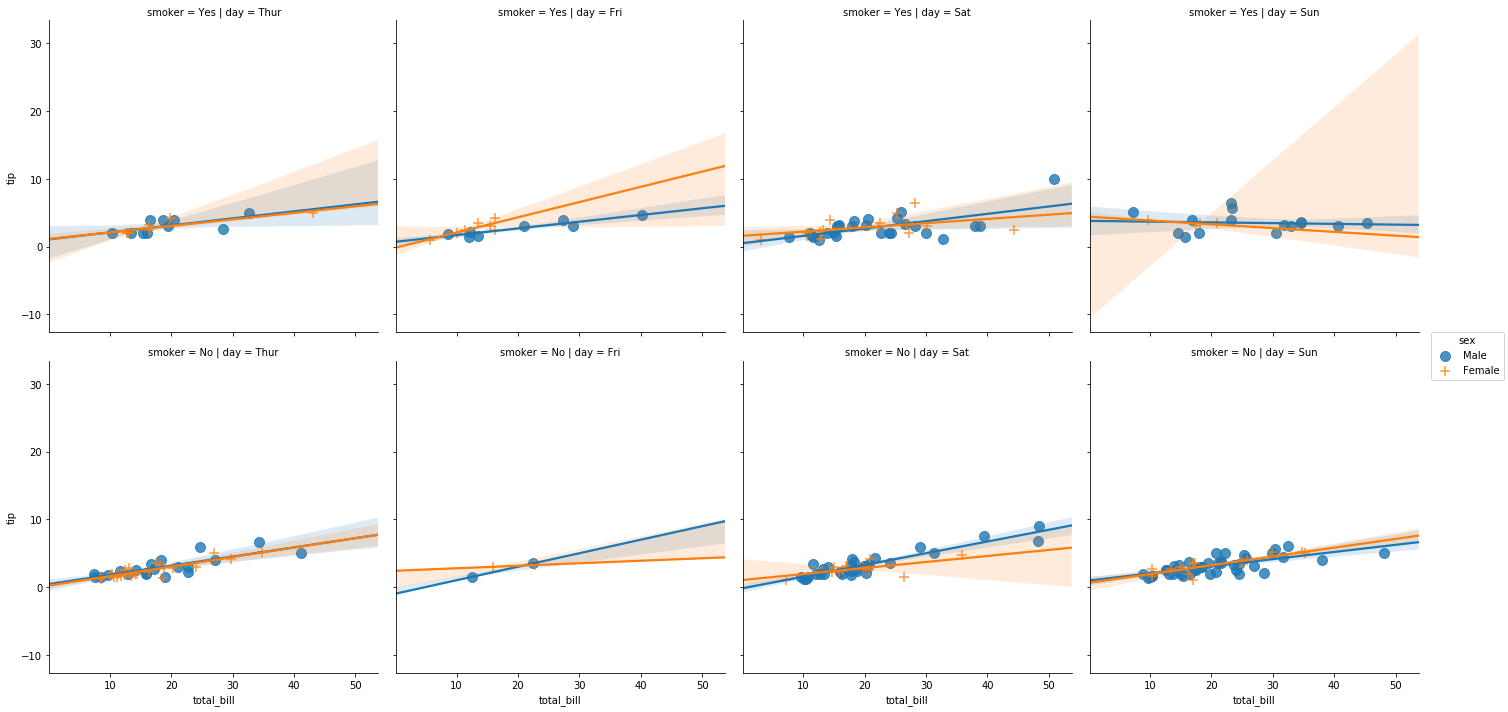

In [53]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o', '+'], col='day', row='smoker',
          scatter_kws={'s':100}) #kwargs go directly to matplotlib under the hood. See doc.

## Style and Color

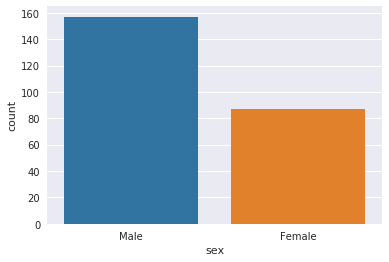

In [61]:
# context allows me to change, as a form of decorator
sns.set_context('notebook')
sns.set_style('darkgrid')
sns.countplot(x='sex', data=tips)
sns.despine(left=True, bottom=True) # remove spins

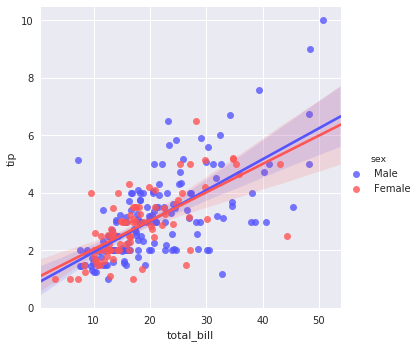

In [66]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', palette='seismic')